In [23]:
import plotnine as p9
import pandas as pd
import scipy.stats as stats
import numpy as np

In [24]:
data = pd.read_csv('olyathswim.csv')
athletes = data[data['Team'] == 'United States']

In [25]:
medal = ['Gold','Silver','Bronze']
athletes['MedalTF']= athletes['Medal'].map(lambda x: True if (pd.notnull(x)) else False)

/var/folders/9s/zz7k8h2949d__gv0rmbn3yj80000gn/T/ipykernel_71163/1804617783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Chi-square test

In [26]:
# Extract sex ratio
sexratio = athletes['Sex'].value_counts()

# Perform Chi-square test
chi= stats.chisquare(sexratio)
print(chi)

# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between sexes is statistically significant")
else:
    print("No significant difference between sexes found")

Power_divergenceResult(statistic=568.4776119402985, pvalue=1.2035877899749622e-125)
Difference between sexes is statistically significant


## Fisher's exact test

In [27]:
# Create a table of cross-tabulations
table = pd.crosstab(athletes.MedalTF,athletes.Sport)
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')
print(fisher)
# Is the result significant?
alpha = 0.05
if fisher[1] < alpha:
    print("Proportions of medal winners differ significantly")
else:
    print("No significant difference in proportions of medal winners found")

Sport    Athletics  Swimming
MedalTF                     
False         2131       556
True          1071      1066
(3.8148405645231716, 2.4220956742371155e-101)
Proportions of medal winners differ significantly


## Pearson correlation

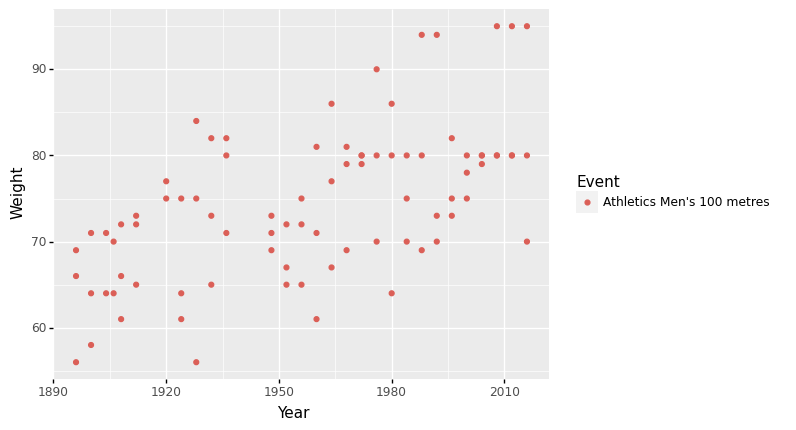

In [42]:
athletes_glob = data[(data['Sport']=='Athletics') & (data['Event']=="Athletics Men's 100 metres") & ((data['Medal'].isin(['Gold','Silver','Bronze']))== True)]
athletes_glob = athletes_glob.dropna(subset=['Weight','Year'])
# Create the scatter plot
print(p9.ggplot(athletes_glob)+ p9.aes(x='Year', y='Weight', color='Event')+  p9.geom_point())

In [44]:
# Run the correlation test
pearson = stats.pearsonr(athletes_glob.Weight, athletes_glob.Year)
print(pearson)

# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and year are significantly correlated")
else:
    print("No significant correlation found")

(0.5906303581794902, 3.3442384137390154e-09)
Weights and year are significantly correlated
